# Predict Salary based on Experience, Test Score and Interview Score

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing dataset and changing few column names 

df = pd.read_csv('hiring.csv')

df.rename(columns={'salary($)':'salary','test_score(out of 10)':'test_score','interview_score(out of 10)':'interview_score'},inplace=True)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
# Replacing NaN values in experience column with zero

df['experience'].fillna('zero',inplace=True)
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
# Import python library for converting word to number

from word2number import w2n

In [5]:
# Storing experience column values in the variable 'exp'

exp = df['experience'].values
exp

array(['zero', 'zero', 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [6]:
# Storing the converted values in the variable 'exp2'

exp2 = []
for i in exp:
    j = w2n.word_to_num(i)
    exp2.append(j)

df['experience'] = exp2
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
# Finding median values and replacing it with NaN values in 'test_score' column

m = df['test_score'].median()
df['test_score'].fillna(m,inplace=True)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [8]:
# Importing linear model from sklearn library

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']],df.salary)

LinearRegression()

In [9]:
# Eq will be ' y = m1x1 + m2x2 + m3x3 + c '
# coef_ = m1, m2 & m3 

reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [10]:
# intercept_ = c

reg.intercept_

17737.263464337688

In [11]:
# 2 years experience, 9 test score, 6 interview score

reg.predict([[2,9,6]])

C:\Users\ASUS\Anaconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [12]:
# 12 years experience, 10 test score, 10 interview score

reg.predict([[12,10,10]])

C:\Users\ASUS\Anaconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

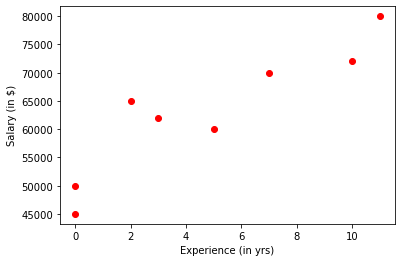

In [13]:
# Plotting groph of Experience vs Salary

plt.xlabel('Experience (in yrs)')
plt.ylabel('Salary (in $)')
plt.scatter(df.experience,df.salary, color='red')

# plt.plot(df.experience,reg.predict(df[['experience','test_score','interview_score']]), color='blue')

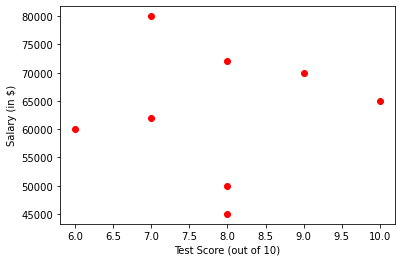

In [14]:
# Plotting groph of test_score vs Salary

plt.xlabel('Test Score (out of 10)')
plt.ylabel('Salary (in $)')
plt.scatter(df.test_score,df.salary, color='red')

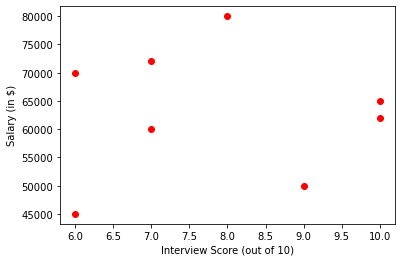

In [15]:
# Plotting groph of interview_score vs Salary

plt.xlabel('Interview Score (out of 10)')
plt.ylabel('Salary (in $)')
plt.scatter(df.interview_score,df.salary, color='red')

In [16]:
# Finding the accuracy of the model using R2 score

from sklearn.metrics import r2_score
x = df.salary
y = reg.predict(df[['experience','test_score','interview_score']])
r2_score(x,y)

0.961678000257796